### Data Comparing Script

**Purpose:** Compare `mratio` and calculate `r` and `p` for **all** combinations of domains in all datasets **with hmetad calculation**

Author: Saurish Srivastava @ [Subjectivity Lab](https://subjectivity.sites.northeastern.edu/)

In [ ]:
# install packages
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scipy

In [1]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import math
import matplotlib.pyplot as plt

from itertools import combinations

sns.set_context("talk")
sns.set_style('darkgrid')

In [2]:
# to filter out Runtime warnings from metrics (happens due to log of small numbers):
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in log")

## Add Metrics

In [28]:
def addMetrics(dataName, domains):
    """
    For string {dataName} & list {domains}: adds the log of mratios & DGIs for each combination for domains.
    Returns: a dataframe with above variables and exports to '/exports/metrics_{dataName}.csv'
    """
    # adjust domains
    temp_domains = [domain + '_log_mratio' for domain in domains]
    temp_domains.insert(0, 'Subject')
    
    # read in data
    originalData = pd.read_csv("../../exports/hmetad_" + dataName + ".csv")
    metricData = pd.read_csv("../../exports/hmetad_" + dataName + ".csv", usecols=['Subject'])
    
    # get data in order by subject
    metricData = metricData.sort_values(by=['Subject']).reset_index(drop=True)
    
    # get DGI
    for combo in combinations(domains, 2):
        metricData['DGI_' + combo[0] + '_' + combo[1]] = abs(originalData[combo[0] + '_log_mratio'] -
                                                       originalData[combo[1] + '_log_mratio'])
    # combine both dfs into one
    fullData = originalData.merge(metricData, on='Subject', how='outer')
    
    # export full data to {export} location
    fullData.to_csv('../../exports/hmetad_metrics_' + dataName + '.csv')
    print(f"Exported: 'hmetad_metrics_{dataName}.csv'")
    
    return fullData

In [29]:
addMetrics(dataName='Arbuzova_unpub_3', domains=['memory', 'visual', 'visuomotor', 'motor'])

Exported: 'hmetad_metrics_Arbuzova_unpub_3.csv'


,Subject,memory_dprime,memory_criterion,memory_metad,memory_mratio,memory_log_mratio,visual_dprime,visual_criterion,visual_metad,visual_mratio,...,visuomotor_criterion,visuomotor_metad,visuomotor_mratio,visuomotor_log_mratio,DGI_memory_visual,DGI_memory_visuomotor,DGI_memory_motor,DGI_visual_visuomotor,DGI_visual_motor,DGI_visuomotor_motor
0,1,1.368,-0.119,2.090,1.565,0.425,1.021,-0.011,1.667,1.686,...,NaN,NaN,NaN,NaN,0.067,NaN,NaN,NaN,NaN,NaN
1,2,1.027,0.033,1.411,1.426,0.314,1.131,-0.258,0.330,0.300,...,-0.023,0.913,0.808,-0.286,1.687,0.600,1.304,1.087,0.383,0.704
2,3,1.800,0.220,2.172,1.222,0.182,1.130,-0.200,1.043,0.951,...,-0.296,0.786,0.891,-0.203,0.292,0.385,1.082,0.093,0.790,0.697
3,4,1.867,0.003,1.743,0.949,-0.083,1.289,0.184,0.981,0.775,...,-0.002,1.665,1.336,0.257,0.219,0.340,0.322,0.559,0.103,0.662
4,5,1.082,0.080,1.307,1.242,0.179,1.395,-0.608,1.666,1.235,...,-0.176,0.650,0.512,-0.777,0.003,0.956,0.566,0.953,0.563,0.390
5,6,1.071,0.360,1.591,1.538,0.387,1.139,-0.245,1.193,1.078,...,0.116,1.175,1.115,0.055,0.367,0.332,0.809,0.035,0.442,0.477
6,7,0.942,0.001,1.531,1.697,0.489,1.193,0.104,1.212,1.043,...,-0.363,0.525,0.423,-0.980,0.500,1.469,1.372,0.969,0.872,0.097
7,8,1.593,-0.070,1.850,1.181,0.142,1.209,0.128,1.364,1.155,...,0.078,0.154,0.162,-2.132,0.072,2.274,0.771,2.202,0.699,1.503
8,9,1.553,0.040,1.795,1.176,0.135,1.286,-0.368,0.979,0.782,...,-0.046,0.534,0.547,-0.805,0.439,0.940,1.003,0.501,0.564,0.063
9,10,1.144,0.185,1.273,1.148,0.090,1.201,-0.341,0.984,0.840,...,-0.229,0.592,0.482,-0.852,0.314,0.942,1.729,0.628,1.415,0.787


In [30]:
addMetrics(dataName='Mazancieux_2018', domains=['VP', 'EF', 'SM', 'EM'])

Exported: 'hmetad_metrics_Mazancieux_2018.csv'


,Subject,VP_dprime,VP_criterion,VP_metad,VP_mratio,VP_log_mratio,SM_dprime,SM_criterion,SM_metad,SM_mratio,...,EF_criterion,EF_metad,EF_mratio,EF_log_mratio,DGI_VP_EF,DGI_VP_SM,DGI_VP_EM,DGI_EF_SM,DGI_EF_EM,DGI_SM_EM
0,1,1.317,-0.074,0.809,0.673,-0.637,1.275,0.119,1.769,1.543,...,0.100,2.681,1.173,0.090,0.727,0.940,1.259,0.213,0.532,0.319
1,2,0.816,-0.410,0.497,0.726,-0.646,3.367,-0.136,1.039,0.319,...,1.884,6.643,0.715,-0.348,0.298,0.697,0.157,0.995,0.141,0.854
2,3,1.675,-0.058,1.055,0.670,-0.600,0.872,-0.290,1.265,1.784,...,-0.020,2.650,1.318,0.173,0.773,0.948,1.436,0.175,0.663,0.488
3,4,1.518,-0.019,1.208,0.863,-0.317,0.584,0.046,0.987,2.030,...,0.179,2.480,0.967,-0.128,0.189,0.739,0.839,0.550,0.650,0.100
4,5,1.445,-0.112,1.131,0.856,-0.361,1.519,0.032,1.360,0.954,...,-0.451,7.851,0.651,-0.576,0.215,0.161,1.408,0.376,1.623,1.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,177,1.029,0.224,0.919,1.029,-0.212,1.866,-0.032,1.122,0.637,...,0.121,4.021,1.375,0.265,0.477,0.408,0.262,0.885,0.739,0.146
177,178,0.573,-0.292,0.381,0.893,-0.545,1.564,-0.243,1.711,1.180,...,-0.137,9.815,2.443,0.879,1.424,0.596,1.023,0.828,0.401,0.427
178,179,0.729,-0.139,0.651,1.056,-0.237,1.373,-0.251,1.986,1.585,...,-0.049,2.827,1.262,0.162,0.399,0.589,0.403,0.190,0.802,0.992
179,180,0.944,-0.030,0.416,0.526,-0.950,0.683,-0.135,0.590,1.021,...,0.101,2.995,0.752,-0.399,0.551,0.670,1.100,0.119,0.549,0.430


In [31]:
addMetrics(dataName='Sadeghi_2017', domains=['memory', 'perception'])

Exported: 'hmetad_metrics_Sadeghi_2017.csv'


,Subject,memory_dprime,memory_criterion,memory_metad,memory_mratio,memory_log_mratio,perception_dprime,perception_criterion,perception_metad,perception_mratio,perception_log_mratio,DGI_memory_perception
0,501,0.431,-0.317,0.401,1.049,-0.162,1.250,0.288,1.635,1.345,0.267,0.429
1,503,0.965,0.555,1.201,1.284,0.200,1.153,-0.022,1.623,1.442,0.290,0.090
2,504,1.517,0.138,4.018,2.436,0.334,1.061,-0.183,0.819,0.791,-0.349,0.683
3,505,0.741,-0.393,0.501,0.716,-0.506,1.157,-0.092,0.741,0.656,-0.522,0.016
4,507,0.814,-0.205,0.848,1.087,0.016,1.144,0.473,0.913,0.826,-0.254,0.270
5,508,0.656,0.417,0.904,1.499,0.305,1.466,0.753,1.547,1.094,0.051,0.254
6,509,1.672,-0.447,0.872,0.529,-0.694,1.124,0.014,0.357,0.325,-1.353,0.659
7,510,1.227,0.084,0.901,0.748,-0.357,1.253,0.214,1.167,0.954,-0.096,0.261
8,511,1.427,-0.231,0.909,0.649,-0.491,1.511,0.746,1.339,0.908,-0.164,0.327
9,512,1.355,-0.167,0.943,0.710,-0.400,1.010,0.170,1.412,1.453,0.333,0.733


In [32]:
addMetrics(dataName='Samaha_2016', domains=['percept_low', 'percept_high', 'wm_low', 'wm_high'])

Exported: 'hmetad_metrics_Samaha_2016.csv'


,Subject,percept_low_dprime,percept_low_criterion,percept_low_metad,percept_low_mratio,percept_low_log_mratio,percept_high_dprime,percept_high_criterion,percept_high_metad,percept_high_mratio,...,wm_low_criterion,wm_low_metad,wm_low_mratio,wm_low_log_mratio,DGI_percept_low_percept_high,DGI_percept_low_wm_low,DGI_percept_low_wm_high,DGI_percept_high_wm_low,DGI_percept_high_wm_high,DGI_wm_low_wm_high
0,1,1.183,-0.195,0.954,0.830,-0.263,0.784,0.117,1.046,1.427,...,-0.029,0.544,0.401,-1.090,0.534,0.827,0.912,1.361,1.446,0.085
1,2,0.365,0.400,0.163,0.577,-0.899,0.223,0.250,0.114,0.744,...,0.164,0.198,0.946,-0.416,0.184,0.483,0.295,0.299,0.111,0.188
2,3,0.812,0.260,1.354,1.765,0.494,0.974,0.265,1.029,1.093,...,-0.181,0.699,0.729,-0.485,0.513,0.979,1.216,0.466,0.703,0.237
3,4,2.505,0.156,1.405,0.567,-0.645,2.296,-0.028,1.982,0.872,...,0.029,0.590,0.489,-0.860,0.481,0.215,1.095,0.696,1.576,0.880
4,5,0.862,0.142,0.598,0.726,-0.453,0.932,0.102,0.685,0.771,...,-0.057,0.528,0.451,-1.014,0.069,0.561,0.670,0.630,0.739,0.109
5,6,1.503,-0.163,0.962,0.650,-0.502,1.889,-0.109,1.526,0.821,...,-0.040,1.177,1.075,0.000,0.258,0.502,0.093,0.244,0.351,0.595
6,7,0.929,-0.205,0.622,0.690,-0.487,1.518,0.029,0.973,0.653,...,-0.121,0.549,0.572,-0.792,0.016,0.305,1.001,0.289,0.985,0.696
7,8,1.116,-0.008,0.781,0.722,-0.431,0.849,0.034,0.464,0.571,...,-0.011,0.413,1.105,-0.162,0.306,0.269,0.494,0.575,0.188,0.763
8,9,1.857,0.057,1.155,0.629,-0.513,1.274,0.234,1.039,0.837,...,-0.177,1.101,0.904,-0.168,0.277,0.345,0.206,0.068,0.483,0.551
9,10,0.788,-0.144,0.988,1.327,0.193,1.660,-0.089,1.717,1.051,...,0.224,0.875,1.153,0.009,0.173,0.184,0.242,0.011,0.069,0.058


In [33]:
addMetrics(dataName='Samaha_2017_exp3', domains=['oriperc', 'contrast', 'oriwm'])

Exported: 'hmetad_metrics_Samaha_2017_exp3.csv'


,Subject,oriperc_dprime,oriperc_criterion,oriperc_metad,oriperc_mratio,oriperc_log_mratio,contrast_dprime,contrast_criterion,contrast_metad,contrast_mratio,contrast_log_mratio,oriwm_dprime,oriwm_criterion,oriwm_metad,oriwm_mratio,oriwm_log_mratio,DGI_oriperc_contrast,DGI_oriperc_oriwm,DGI_contrast_oriwm
0,1,1.544,0.047,0.565,0.369,-1.089,1.694,-0.060,0.919,0.547,-0.655,0.386,-0.216,0.162,0.462,-0.999,0.434,0.090,0.344
1,2,1.629,-0.139,0.573,0.355,-1.129,1.616,-0.025,1.127,0.704,-0.383,0.690,-0.350,0.468,0.707,-0.478,0.746,0.651,0.095
2,3,1.907,0.283,0.758,0.401,-0.992,1.714,-0.234,1.475,0.869,-0.162,1.843,-0.077,0.943,0.516,-0.710,0.830,0.282,0.548
3,4,0.663,-0.258,0.215,0.320,-1.247,2.258,-0.148,0.491,0.220,-1.738,0.847,-0.271,0.179,0.217,-1.750,0.491,0.503,0.012
4,5,1.694,-0.334,0.199,0.118,-2.381,1.935,0.666,0.406,0.212,-1.661,1.367,-0.383,0.356,0.262,-1.452,0.720,0.929,0.209
5,6,1.475,-0.414,1.245,0.652,-0.510,1.742,0.093,0.750,0.434,-0.902,1.730,-0.077,1.159,0.675,-0.420,0.392,0.090,0.482
6,7,2.468,0.583,2.009,0.821,-0.210,1.705,-0.122,1.222,0.722,-0.355,2.070,-0.101,1.934,0.941,-0.075,0.145,0.135,0.280
7,8,1.803,0.063,1.770,0.990,-0.027,1.705,0.522,0.950,0.563,-0.611,1.922,-0.159,1.727,0.906,-0.117,0.584,0.090,0.494
8,9,1.429,-0.048,1.393,0.984,-0.042,1.666,-0.252,0.407,0.246,-1.533,1.647,-0.773,0.387,0.238,-1.575,1.491,1.533,0.042
9,10,1.731,0.122,0.461,0.268,-1.507,1.679,0.182,0.578,0.347,-1.154,1.552,-0.345,0.368,0.240,-1.577,0.353,0.070,0.423


In [34]:
addMetrics(dataName='Schmidt_2019', domains=['memory', 'perception'])

Exported: 'hmetad_metrics_Schmidt_2019.csv'


,Subject,memory_dprime,memory_criterion,memory_metad,memory_mratio,memory_log_mratio,perception_dprime,perception_criterion,perception_metad,perception_mratio,perception_log_mratio,DGI_memory_perception
0,1,1.729,0.054,1.734,1.016,-0.006,1.205,-0.336,0.947,0.799,-0.258,0.252
1,2,1.547,-0.243,1.972,1.296,0.237,1.116,-0.277,1.346,1.229,0.181,0.056
2,5,2.350,-0.129,1.654,0.710,-0.378,1.142,-0.082,1.025,0.913,-0.125,0.253
3,15,2.109,0.097,1.843,0.890,-0.148,1.458,-0.489,1.491,1.037,0.018,0.166
4,22,0.968,0.118,1.287,1.373,0.279,1.545,-0.742,1.292,0.849,-0.183,0.462
5,28,1.229,0.087,1.501,1.249,0.195,1.044,0.198,0.273,0.267,-1.528,1.723
6,29,1.463,0.485,1.868,1.301,0.242,1.387,-0.563,1.018,0.745,-0.322,0.564
7,30,2.100,0.120,1.674,0.806,-0.244,1.371,-0.357,2.125,1.573,0.439,0.683
8,31,0.783,0.017,0.506,0.677,-0.523,1.105,-0.166,0.945,0.869,-0.174,0.349
9,39,1.292,0.261,1.700,1.345,0.272,1.149,-0.287,1.189,1.054,0.027,0.245


In [35]:
addMetrics(dataName='Skora_2016', domains=['FM', 'IM', 'WM'])

Exported: 'hmetad_metrics_Skora_2016.csv'


,Subject,FM_dprime,FM_criterion,FM_metad,FM_mratio,FM_log_mratio,IM_dprime,IM_criterion,IM_metad,IM_mratio,IM_log_mratio,WM_dprime,WM_criterion,WM_metad,WM_mratio,WM_log_mratio,DGI_FM_IM,DGI_FM_WM,DGI_IM_WM
0,1,1.628,0.036,1.926,1.210,0.154,2.942,0.097,2.911,1.002,-0.031,0.946,0.370,0.416,0.459,-0.992,0.185,1.146,0.961
1,2,1.047,-0.401,1.117,1.120,0.018,2.864,-0.183,3.813,1.349,0.282,1.567,-0.079,0.981,0.639,-0.558,0.264,0.576,0.840
2,3,1.063,-0.179,1.921,1.882,0.596,2.168,0.349,1.399,0.656,-0.490,0.870,0.357,0.329,0.398,-1.184,1.086,1.780,0.694
3,4,1.811,0.019,1.915,1.080,0.038,1.850,0.043,1.339,0.738,-0.362,1.241,0.501,0.841,0.711,-0.449,0.400,0.487,0.087
4,5,2.028,-0.125,2.802,1.406,0.308,3.861,0.398,9.738,2.552,0.930,1.960,0.133,1.487,0.770,-0.390,0.622,0.698,1.320
5,6,1.540,-0.503,1.445,0.965,-0.091,2.461,-0.540,1.761,0.731,-0.362,1.021,0.220,1.558,1.607,0.409,0.271,0.500,0.771
6,7,1.868,-0.005,2.105,1.150,0.104,2.974,0.192,2.869,0.978,-0.054,1.173,0.716,1.297,1.159,0.085,0.158,0.019,0.139
7,8,-3.891,-0.264,-8.385,2.184,0.744,-7.267,-2.034,-5.180,0.757,-0.348,-2.914,0.066,-2.651,0.922,-0.117,1.092,0.861,0.231
8,9,1.637,0.013,0.569,0.355,-1.207,1.577,-0.367,1.737,1.136,0.083,1.029,0.146,1.146,1.172,0.078,1.290,1.285,0.005
9,10,1.407,-0.289,1.912,1.402,0.300,1.482,0.295,1.803,1.252,0.188,1.428,0.173,1.161,0.836,-0.248,0.112,0.548,0.436


In [36]:
addMetrics(dataName='Ye_2018', domains=['perception', 'memory'])

Exported: 'hmetad_metrics_Ye_2018.csv'


,Subject,perception_dprime,perception_criterion,perception_metad,perception_mratio,perception_log_mratio,memory_dprime,memory_criterion,memory_metad,memory_mratio,memory_log_mratio,DGI_perception_memory
0,1,1.757,-0.152,2.513,1.438,0.357,1.285,0.277,1.824,1.432,0.350,0.007
1,2,0.712,-0.390,1.271,1.115,-0.054,0.633,-0.048,0.882,1.437,0.326,0.380
2,3,1.585,-0.027,2.117,1.343,0.288,0.389,-0.370,1.280,1.674,0.261,0.027
3,4,0.827,-0.280,1.478,1.150,-0.026,1.080,0.099,1.925,1.805,0.580,0.606
4,5,1.485,0.046,2.058,1.396,0.325,0.944,0.047,1.850,1.987,0.676,0.351
5,6,1.318,-0.006,1.949,1.493,0.391,0.397,-0.520,1.098,1.403,0.125,0.266
6,7,1.658,0.029,2.639,1.601,0.465,0.708,-0.093,1.309,1.157,-0.023,0.488
7,8,1.688,-0.066,2.068,1.233,0.201,1.215,0.012,1.853,1.539,0.422,0.221
8,9,1.538,-0.048,1.844,1.207,0.179,1.482,-0.039,1.760,1.196,0.169,0.010
9,10,0.420,-0.392,0.806,1.057,-0.105,0.339,0.164,1.251,4.119,1.344,1.449


In [37]:
addMetrics(dataName='Xu_2019_Exp2', domains=['N_low', 'N_high', 'C_low', 'C_high'])

Exported: 'hmetad_metrics_Xu_2019_Exp2.csv'


,Subject,N_low_dprime,N_low_criterion,N_low_metad,N_low_mratio,N_low_log_mratio,C_high_dprime,C_high_criterion,C_high_metad,C_high_mratio,...,N_high_criterion,N_high_metad,N_high_mratio,N_high_log_mratio,DGI_N_low_N_high,DGI_N_low_C_low,DGI_N_low_C_high,DGI_N_high_C_low,DGI_N_high_C_high,DGI_C_low_C_high
0,1,0.869,0.083,1.557,2.065,0.564,2.283,0.128,2.151,0.979,...,0.142,2.264,1.033,-0.060,0.624,0.276,0.688,0.900,0.064,0.964
1,2,0.778,-0.131,1.464,2.189,0.599,3.696,-0.446,1.966,0.569,...,-0.219,2.118,1.394,0.243,0.356,0.024,1.335,0.332,0.979,1.311
2,3,-0.567,0.050,-0.424,0.869,-0.530,2.012,0.188,0.860,0.440,...,-0.074,1.146,1.107,-0.112,0.418,0.649,0.484,0.231,0.902,1.133
3,4,0.332,-0.665,0.475,1.590,0.065,-0.039,-0.011,-0.051,1.064,...,-0.018,1.027,0.790,-0.420,0.485,0.255,0.444,0.230,0.041,0.189
4,5,-0.320,0.124,-0.133,0.794,-0.664,1.977,-0.049,4.488,2.339,...,0.089,1.595,0.964,-0.170,0.494,0.505,1.472,0.011,0.978,0.967
5,7,0.012,-0.106,0.031,1.174,-0.301,1.426,0.012,0.808,0.599,...,-0.016,1.184,0.762,-0.430,0.129,0.715,0.381,0.844,0.252,1.096
6,8,0.749,0.045,1.159,1.791,0.316,NaN,NaN,NaN,NaN,...,-0.227,0.722,0.593,-0.778,1.094,NaN,NaN,NaN,NaN,NaN
7,9,1.448,-0.223,1.724,1.278,0.121,2.013,-0.237,1.199,0.621,...,0.109,0.974,0.698,-0.570,0.691,0.420,0.744,1.111,0.053,1.164
8,10,0.255,0.108,0.581,2.304,0.308,1.984,0.101,1.770,0.932,...,0.293,1.322,0.691,-0.517,0.825,0.668,0.504,0.157,0.321,0.164
9,11,-0.625,-0.049,-0.198,0.572,-1.056,1.577,0.013,2.079,1.403,...,0.215,0.892,0.632,-0.677,0.379,1.118,1.287,0.739,0.908,0.169


## Make Comparisons

In [38]:
def getComparisons(dataName, domains):
    """
    For string {dataName} and list {domains}: finds pearson r and p & creates comparison plots for mratio
    """
    
    # adjust the domains input
    
    domains = [domain + '_log_mratio' for domain in domains]
    domains.insert(0, 'Subject')
    
    # read in data
    data = pd.read_csv("../../exports/hmetad_" + dataName, usecols=domains)
    
    # get data in order by subject
    data = data.sort_values(by=['Subject']).reset_index(drop=True)

    # convert subjects to the index
    data = data.set_index(['Subject'])
    
    # in the event that there are infinite values, replace with NaNs
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data = data.reset_index(drop=True)
    
    # drop rows w/ NaNs if there are not at least 2 domains
    data = data.dropna(subset=list(data.columns), thresh=abs(1-data.shape[1]))
    
    for combo in combinations(list(data.columns), 2):
        plt.figure(figsize=(8,8))
        g = sns.regplot(data=data, x=combo[0], y=combo[1], scatter_kws={'clip_on': False})
        sns.despine(offset=10, trim=True)
        g.set(ylim=(-0.75, 2))
        g.set(xlim=(None, 2.3))
        plt.title(dataName[8:-4] + ': ' + combo[1] + ' vs. ' + combo[0])
        
        x = data[combo[0]]
        y = data[combo[1]]
        nas = np.logical_or(np.isnan(x), np.isnan(y))
        
        print(combo[0] + " & " + combo[1] + " (r, p): " + str(st.pearsonr(x[~nas], y[~nas])))

memory_log_mratio & visual_log_mratio (r, p): (-0.13214325302386365, 0.44233489894723443)
memory_log_mratio & motor_log_mratio (r, p): (-0.14930395845988856, 0.3847953837373846)
memory_log_mratio & visuomotor_log_mratio (r, p): (-0.07335496443648475, 0.6707124134757563)
visual_log_mratio & motor_log_mratio (r, p): (0.2013592157057569, 0.23894543520482184)
visual_log_mratio & visuomotor_log_mratio (r, p): (0.037742122421830775, 0.8270095354370551)
motor_log_mratio & visuomotor_log_mratio (r, p): (0.6560174407566199, 1.401325999752172e-05)


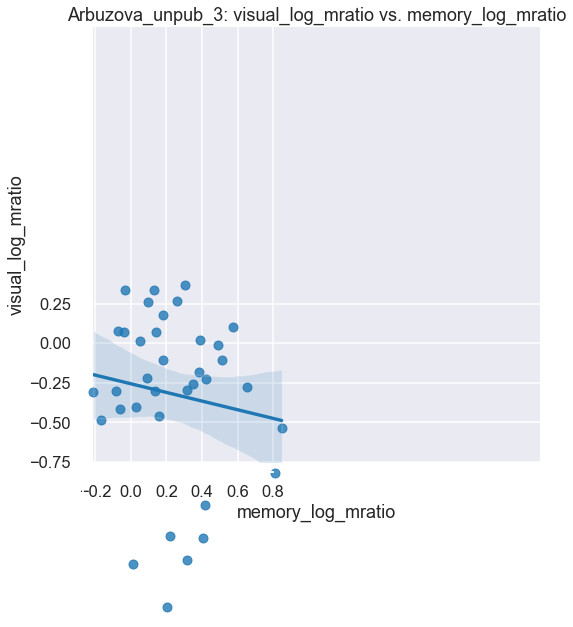

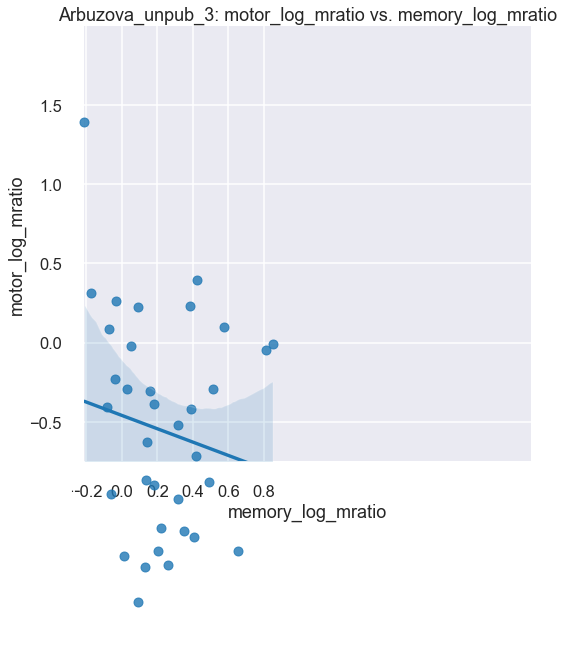

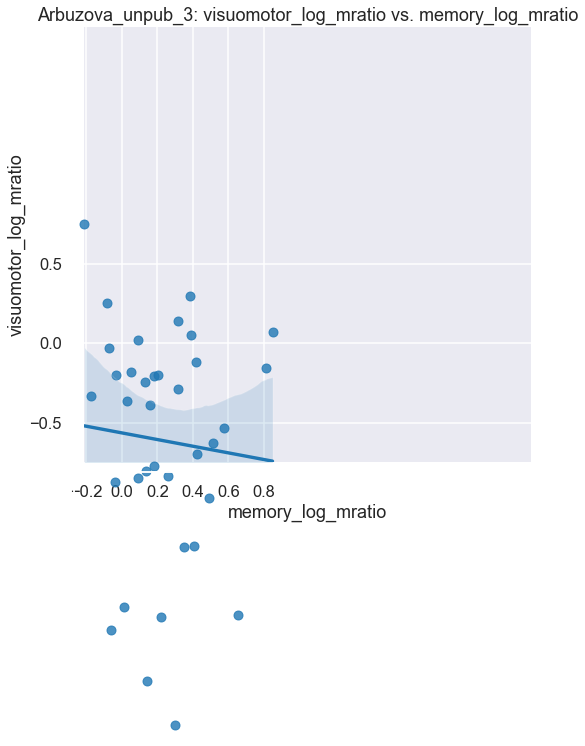

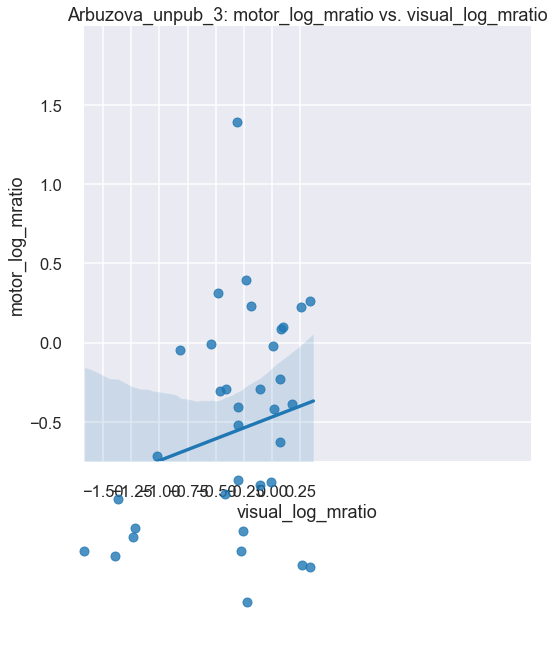

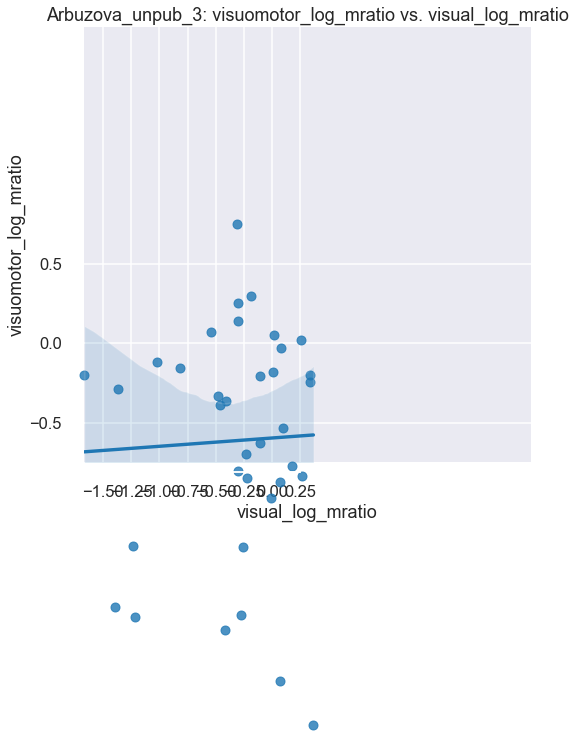

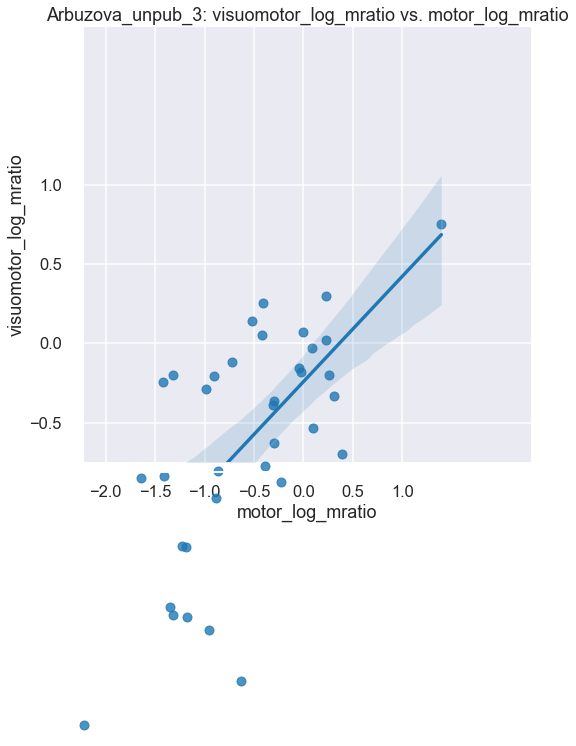

In [39]:
getComparisons(dataName='metrics_Arbuzova_unpub_3.csv', domains=['memory', 'visual', 'motor', 'visuomotor'])

VP_log_mratio & SM_log_mratio (r, p): (0.052595416941886915, 0.4819413756047742)
VP_log_mratio & EM_log_mratio (r, p): (-0.0044612739601426815, 0.9524704191037046)
VP_log_mratio & EF_log_mratio (r, p): (0.08808946536133513, 0.23831627406536135)
SM_log_mratio & EM_log_mratio (r, p): (0.08458105524929864, 0.2576058833590805)
SM_log_mratio & EF_log_mratio (r, p): (0.03142840528111335, 0.6744852036905125)
EM_log_mratio & EF_log_mratio (r, p): (0.11930553388616388, 0.1096672829140994)


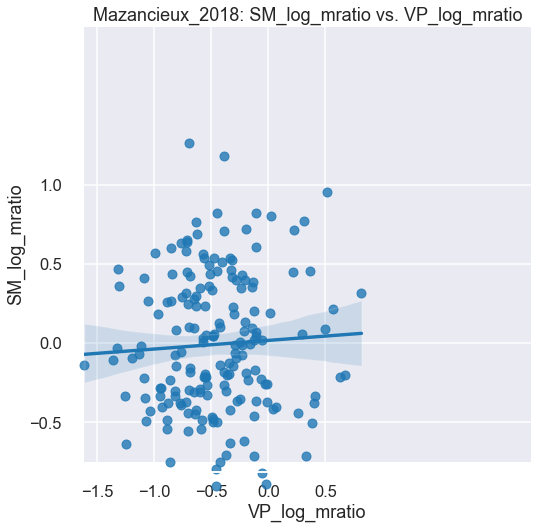

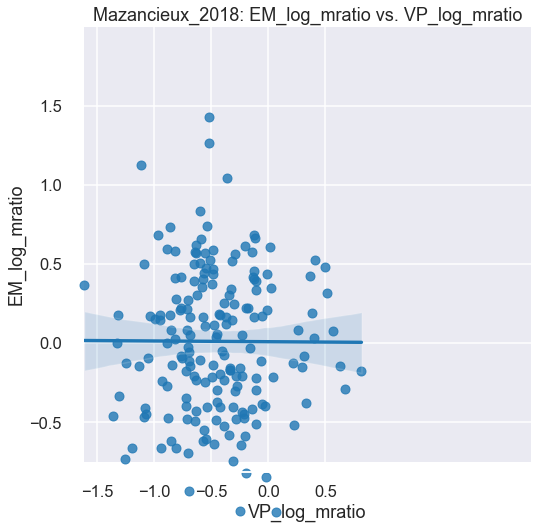

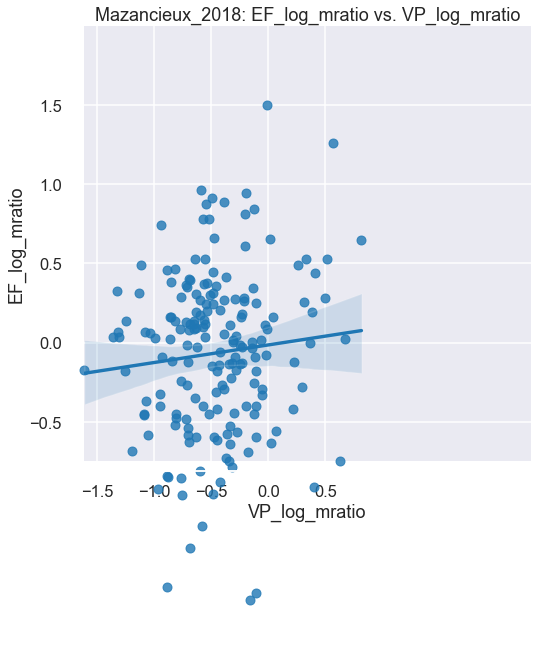

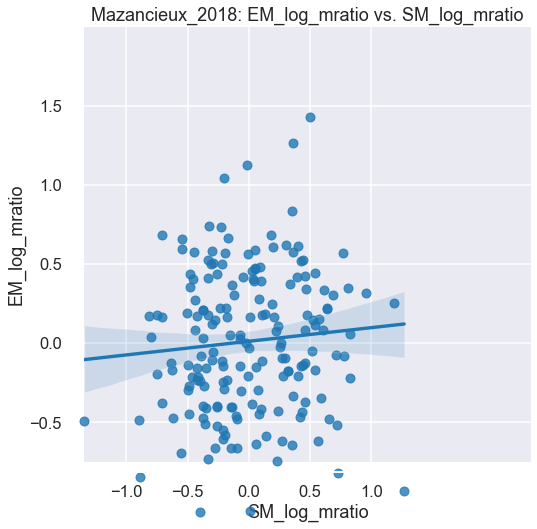

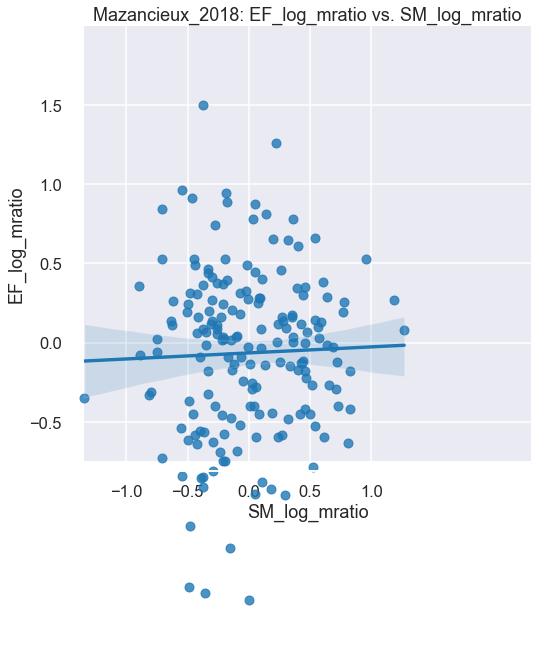

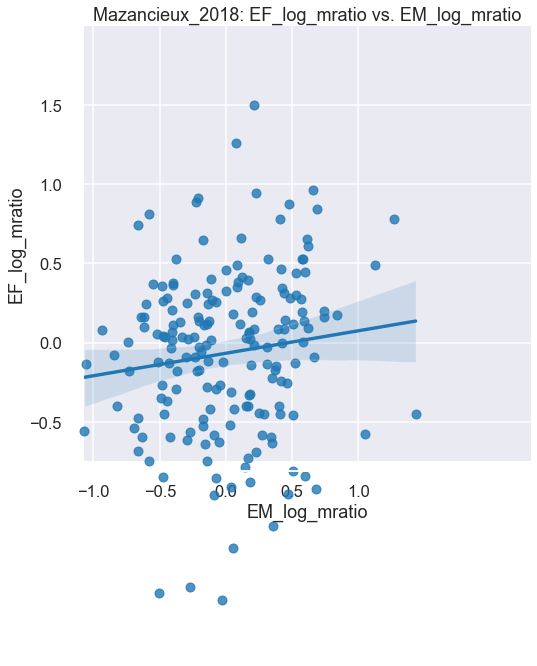

In [40]:
getComparisons(dataName='metrics_Mazancieux_2018.csv', domains=['VP', 'EF', 'SM', 'EM'])

percept_low_log_mratio & percept_high_log_mratio (r, p): (0.5455612816055923, 0.035415970354180946)
percept_low_log_mratio & wm_high_log_mratio (r, p): (-0.08913506976624523, 0.752079368519238)
percept_low_log_mratio & wm_low_log_mratio (r, p): (0.3842531798011497, 0.1573371602194582)
percept_high_log_mratio & wm_high_log_mratio (r, p): (-0.29713023868037236, 0.28216290597911703)
percept_high_log_mratio & wm_low_log_mratio (r, p): (0.004640602338465485, 0.986904402813099)
wm_high_log_mratio & wm_low_log_mratio (r, p): (0.46829836552776477, 0.07831070187708698)


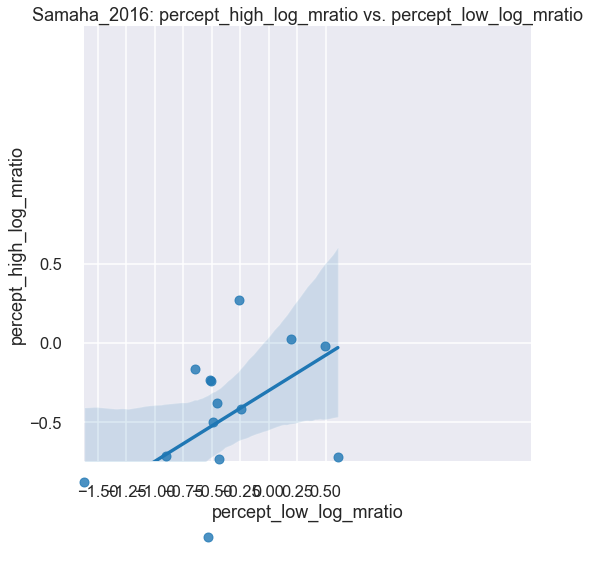

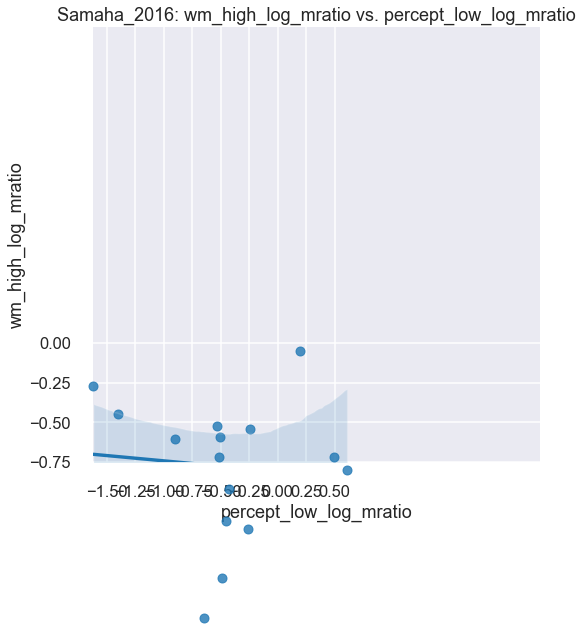

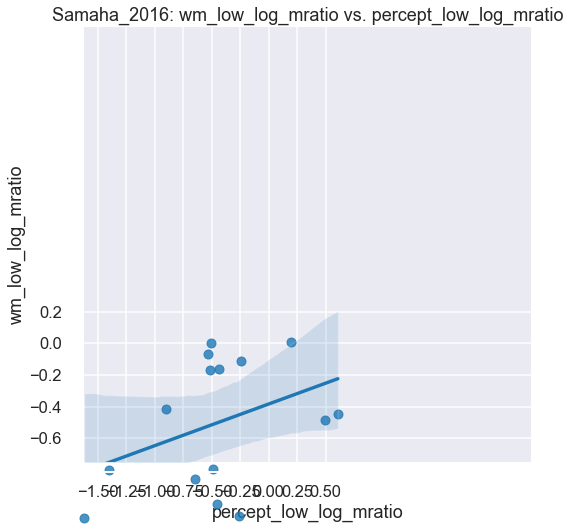

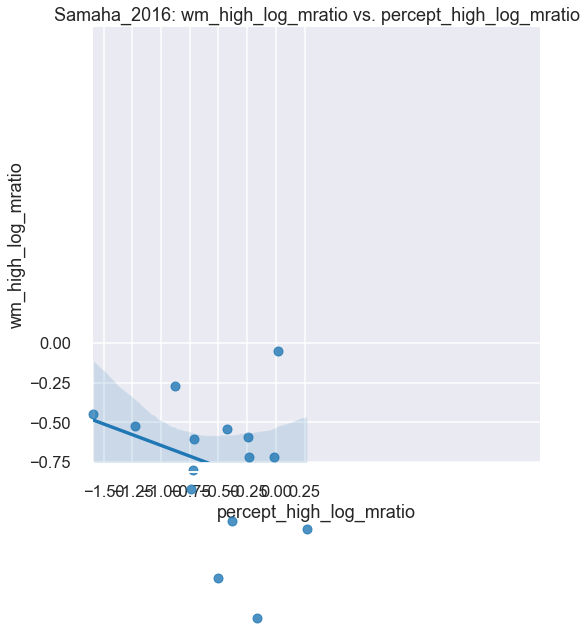

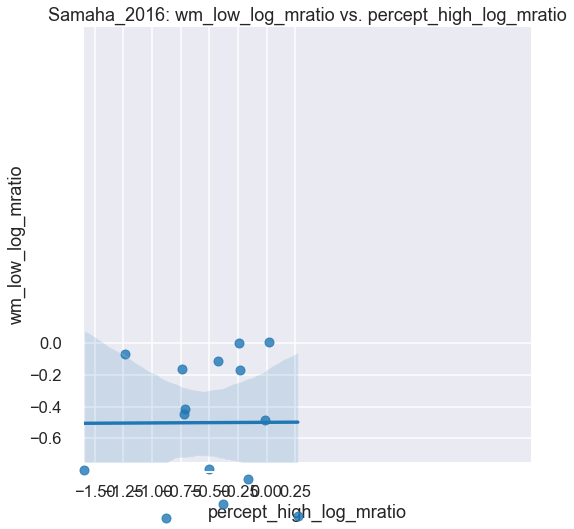

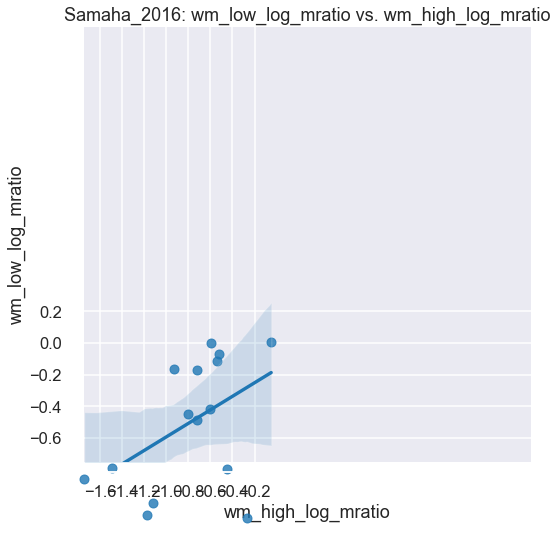

In [41]:
getComparisons(dataName='metrics_Samaha_2016.csv', domains=['percept_low', 'percept_high', 'wm_low', 'wm_high'])

memory_log_mratio & perception_log_mratio (r, p): (0.4276236229355265, 0.03298360401041003)


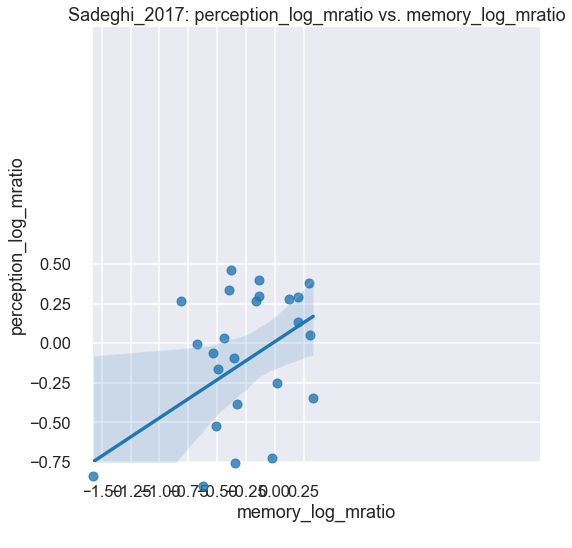

In [42]:
getComparisons(dataName='metrics_Sadeghi_2017.csv', domains=['memory', 'perception'])

memory_log_mratio & perception_log_mratio (r, p): (-0.01942087598617242, 0.9234034035306782)


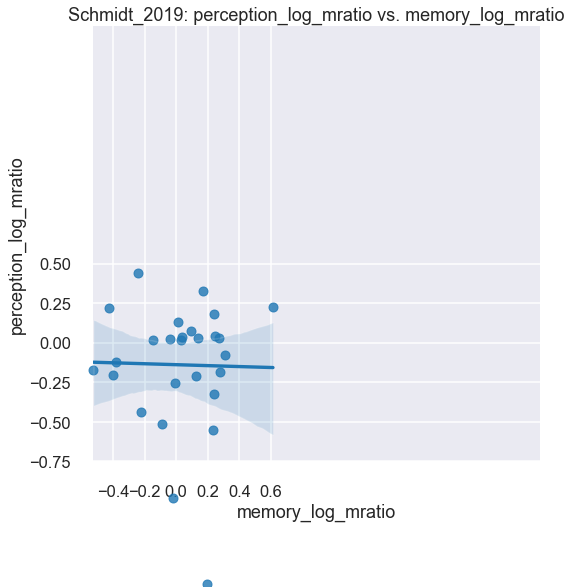

In [43]:
getComparisons(dataName='metrics_Schmidt_2019.csv', domains=['memory', 'perception'])

perception_log_mratio & memory_log_mratio (r, p): (-0.10600593106244084, 0.6754789820393162)


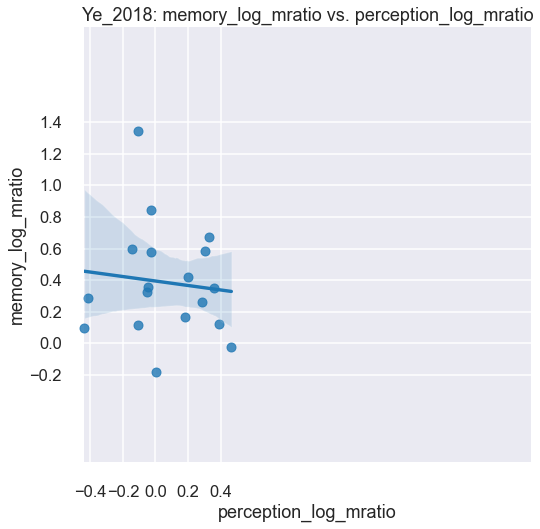

In [44]:
getComparisons(dataName='metrics_Ye_2018.csv', domains=['memory', 'perception'])

oriperc_log_mratio & contrast_log_mratio (r, p): (0.23036891862504616, 0.328503955411711)
oriperc_log_mratio & oriwm_log_mratio (r, p): (0.5711137867765094, 0.00853365459586093)
contrast_log_mratio & oriwm_log_mratio (r, p): (0.26132017814232683, 0.2657567623041313)


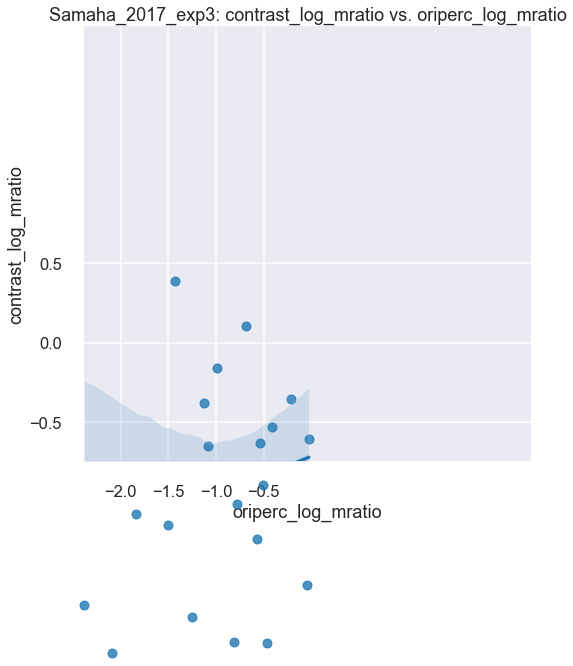

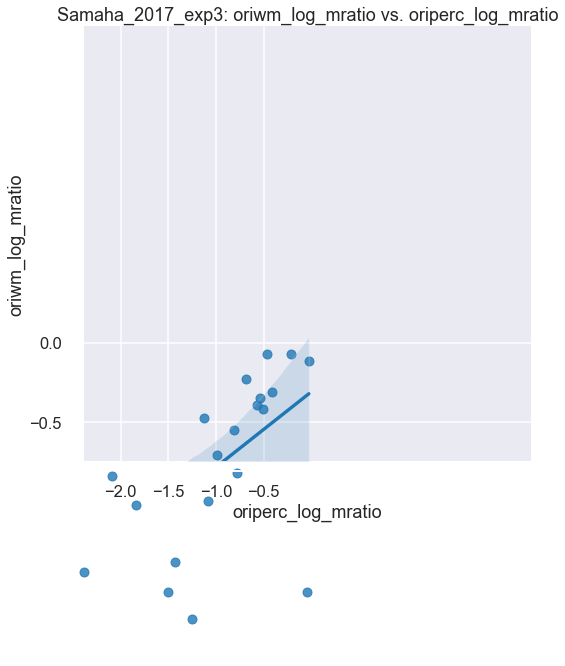

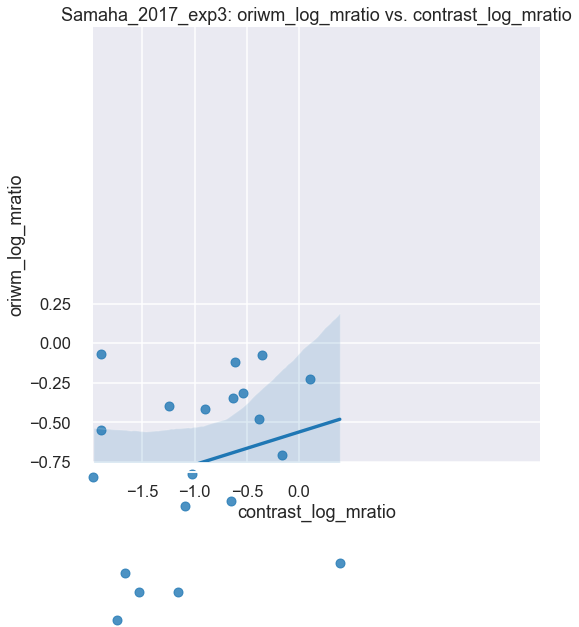

In [45]:
getComparisons(dataName='metrics_Samaha_2017_exp3.csv', domains=['oriperc', 'contrast', 'oriwm'])

FM_log_mratio & IM_log_mratio (r, p): (0.13820345028136644, 0.5725930323230282)
FM_log_mratio & WM_log_mratio (r, p): (0.005145811143629334, 0.9833195946295968)
IM_log_mratio & WM_log_mratio (r, p): (0.195620704413574, 0.42220478904581354)


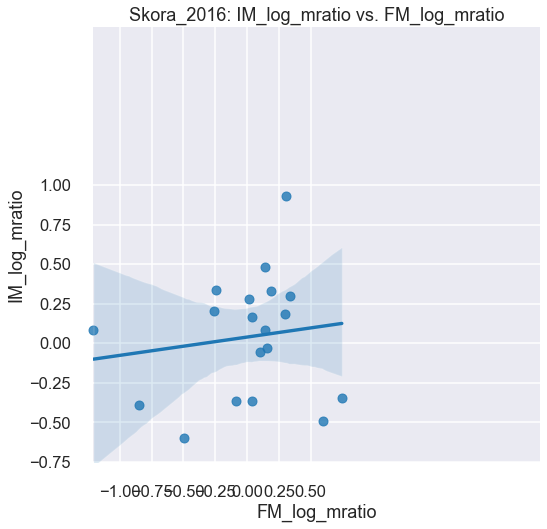

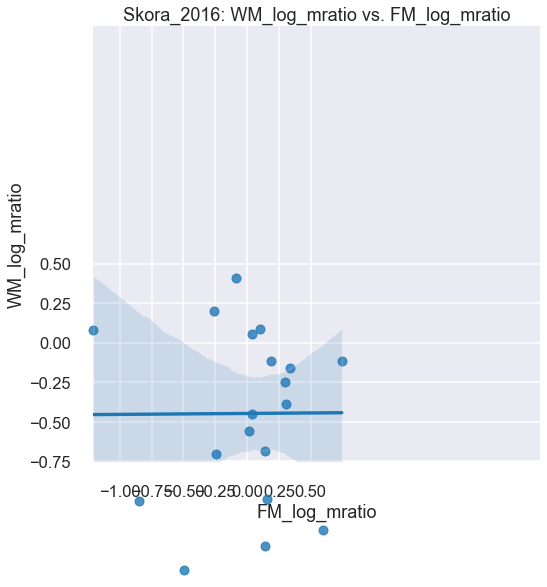

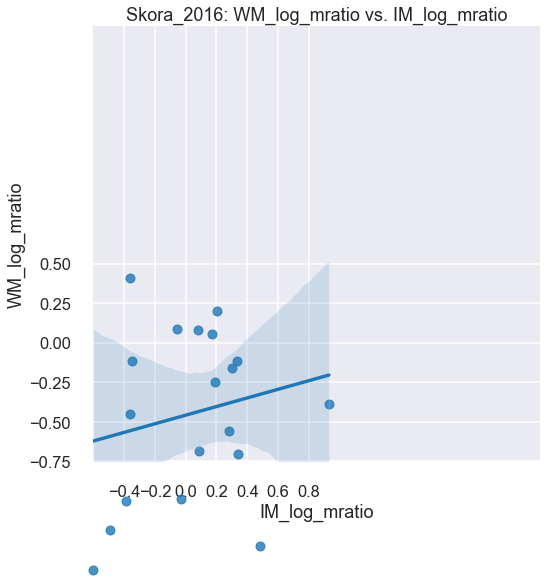

In [46]:
getComparisons(dataName='metrics_Skora_2016.csv', domains=['FM', 'IM', 'WM'])

N_low_log_mratio & C_high_log_mratio (r, p): (-0.08948163272058063, 0.6921028288160174)
N_low_log_mratio & C_low_log_mratio (r, p): (0.07076553743095867, 0.7543281754430945)
N_low_log_mratio & N_high_log_mratio (r, p): (0.32510333817163184, 0.13986112846682705)
C_high_log_mratio & C_low_log_mratio (r, p): (-0.0582818859939848, 0.796694014906883)
C_high_log_mratio & N_high_log_mratio (r, p): (0.1809680129082665, 0.42026854008437564)
C_low_log_mratio & N_high_log_mratio (r, p): (-0.05973593281835617, 0.7917284061155926)


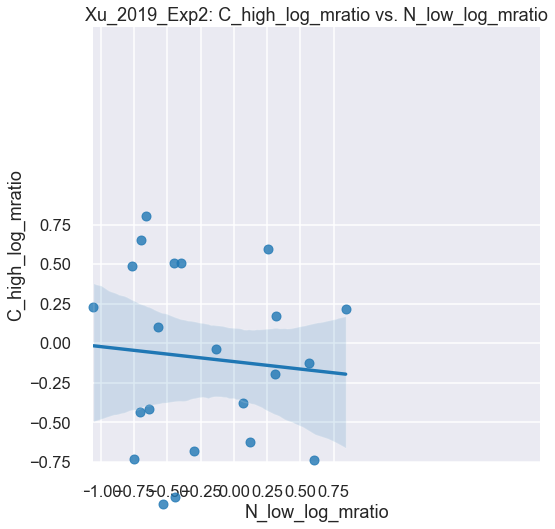

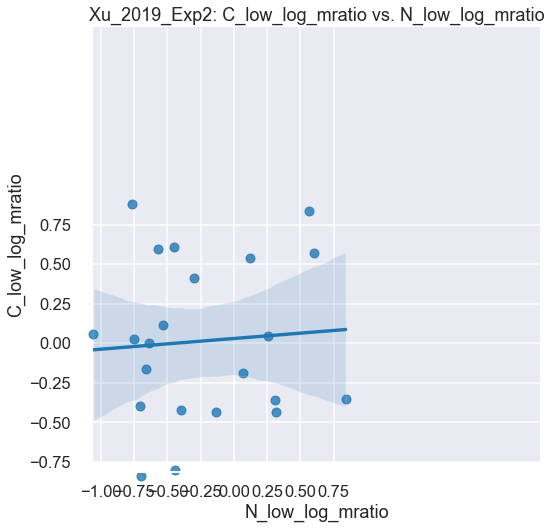

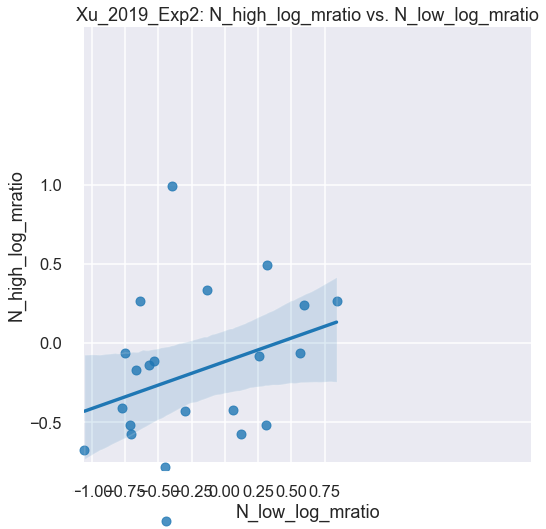

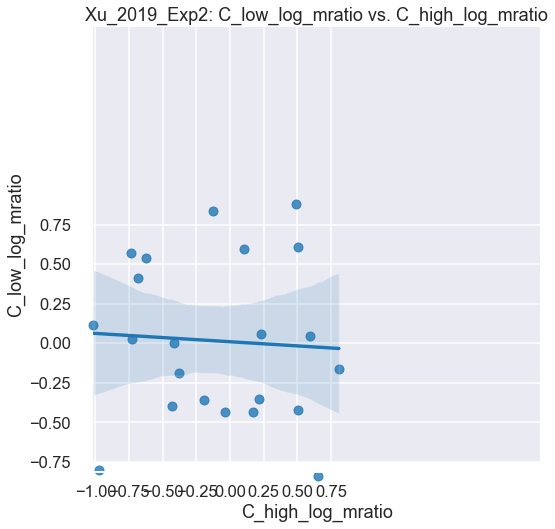

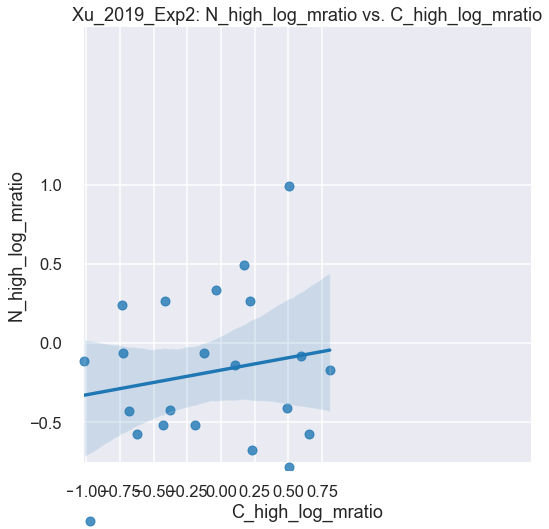

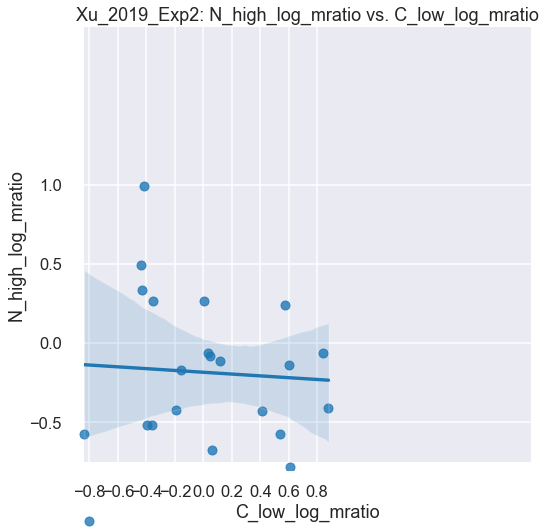

In [47]:
getComparisons(dataName='metrics_Xu_2019_Exp2.csv', domains=['N_low', 'N_high', 'C_low', 'C_high'])

## Create DGI Plots

DGI = domain-generality index – [more information](https://www.jneurosci.org/content/38/14/3534#sec-15)

$DGI = |logM_p - logM_m|$

In [48]:
def createDGIPlot(dataName):
    """
    For string {dataName}: creates side-by-side DGI plots for all combinations of domains
    ** not the cleanest looking, but got the job done for exploration **
    """
    df = pd.read_csv("../exports/" + dataName + ".csv")
    dropColumns = [column for column in list(df.columns) if "DGI" not in column]
    df.drop(dropColumns, axis=1, inplace=True)
    df.columns = df.columns.str.lstrip("DGI_")
    sns.boxplot(x="variable", y="value", data=pd.melt(df))
    sns.stripplot(data=pd.melt(df), x="variable", y="value", color="k")
    plt.tight_layout()
    sns.despine()

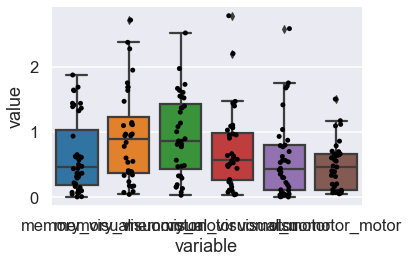

In [49]:
createDGIPlot(dataName='metrics_Arbuzova_unpub_3')

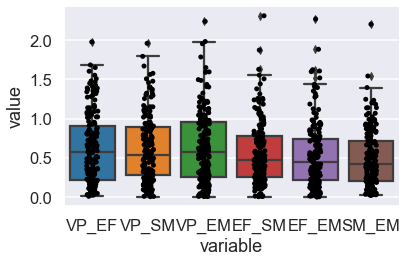

In [50]:
createDGIPlot(dataName='metrics_Mazancieux_2018')

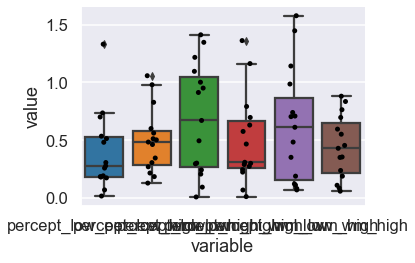

In [51]:
createDGIPlot(dataName='metrics_Samaha_2016')

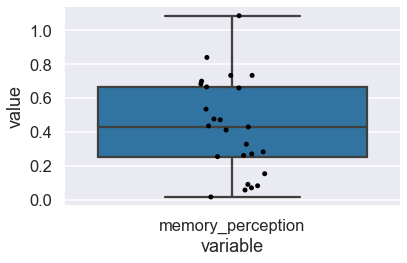

In [52]:
createDGIPlot(dataName='metrics_Sadeghi_2017')

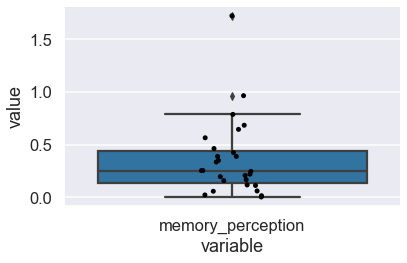

In [53]:
createDGIPlot(dataName='metrics_Schmidt_2019')

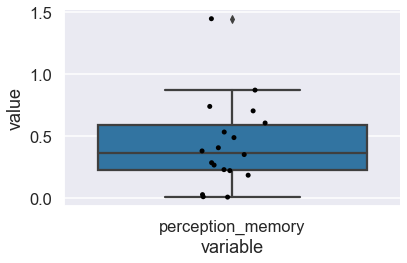

In [54]:
createDGIPlot(dataName='metrics_Ye_2018')

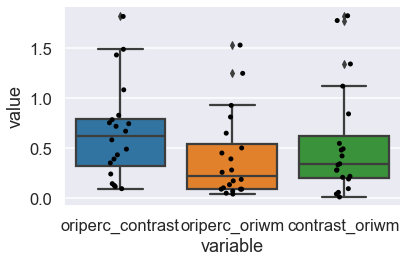

In [55]:
createDGIPlot(dataName='metrics_Samaha_2017_exp3')

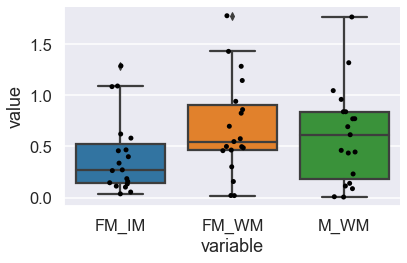

In [56]:
createDGIPlot(dataName='metrics_Skora_2016')

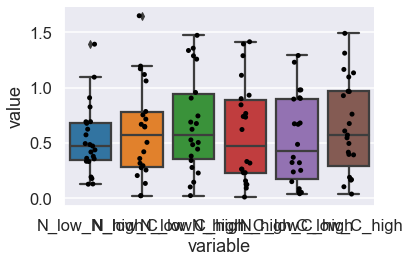

In [57]:
createDGIPlot(dataName='metrics_Xu_2019_Exp2')